In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
inflows = pd.read_csv("../data/inflows of foreign population by nationality.csv", low_memory=False)

In [3]:
inflows.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,NaN,NaN
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,NaN,NaN
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,NaN,NaN


In [15]:
inflows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464640 entries, 0 to 464639
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CO2                           464640 non-null  object 
 1   Country of birth/nationality  464640 non-null  object 
 2   VAR                           464640 non-null  object 
 3   Variable                      464640 non-null  object 
 4   GEN                           464640 non-null  object 
 5   Gender                        464640 non-null  object 
 6   COU                           464640 non-null  object 
 7   Country                       464640 non-null  object 
 8   YEA                           464640 non-null  int64  
 9   Year                          464640 non-null  int64  
 10  Value                         464637 non-null  float64
 11  Flag Codes                    3 non-null       object 
 12  Flags                         3 non-null    

In [5]:
inflows.isna().sum()


CO2                                  0
Country of birth/nationality         0
VAR                                  0
Variable                             0
GEN                                  0
Gender                               0
COU                                  0
Country                              0
YEA                                  0
Year                                 0
Value                                3
Flag Codes                      464637
Flags                           464637
dtype: int64

There are three null values in 'Value'. Let's check them out.

In [8]:
null_values = inflows[inflows['Value'].isna()]
print(null_values)


        CO2 Country of birth/nationality  VAR  \
18616   BEL                      Belgium  B11   
79368   HKG             Hong Kong, China  B11   
191631   NS                   Not stated  B11   

                                            Variable  GEN Gender  COU  \
18616   Inflows of foreign population by nationality  TOT  Total  BEL   
79368   Inflows of foreign population by nationality  TOT  Total  BEL   
191631  Inflows of foreign population by nationality  TOT  Total  BEL   

        Country   YEA  Year  Value Flag Codes            Flags  
18616   Belgium  2010  2010    NaN          e  Estimated value  
79368   Belgium  2010  2010    NaN          e  Estimated value  
191631  Belgium  2010  2010    NaN          e  Estimated value  


In [4]:
# dropping the total migrants value for belgium for 2010.
inflows = inflows.dropna(subset=['Value'])
inflows_cleaned = inflows.dropna(subset=['Value'])

# dropping columns that we don't need
inflows_cleaned = inflows.drop(columns=['Flag Codes', 'Flags'])
inflows_cleaned.head()


,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0


In [4]:
inflows['Variable'].unique

<bound method Series.unique of 0          Inflows of foreign population by nationality
1          Inflows of foreign population by nationality
2          Inflows of foreign population by nationality
3          Inflows of foreign population by nationality
4          Inflows of foreign population by nationality
                              ...                      
464635    Outflows of foreign population by nationality
464636    Outflows of foreign population by nationality
464637    Outflows of foreign population by nationality
464638    Outflows of foreign population by nationality
464639    Outflows of foreign population by nationality
Name: Variable, Length: 464640, dtype: object>

In [5]:
inflows_cleaned = inflows_cleaned[inflows_cleaned['Variable'] == 'Inflows of foreign population by nationality']

In [21]:
print(f"size of the dataset' {inflows_cleaned.shape}")

size of the dataset' (112536, 11)


In [22]:
inflows_cleaned.isna().sum()

CO2                             0
Country of birth/nationality    0
VAR                             0
Variable                        0
GEN                             0
Gender                          0
COU                             0
Country                         0
YEA                             0
Year                            0
Value                           0
dtype: int64

Total Inflows of migrants in a given country

In [23]:
fig = px.choropleth(
    data_frame=inflows_cleaned.groupby(['COU', 'Year', "Country"], as_index=False)['Value'].sum(),
    locations="COU",
    animation_frame="Year",
    animation_group = "COU",
    color="Value",
    title="Migration Inflows Across Countries",
    color_continuous_scale="Viridis",
    projection="equirectangular", 
    labels={"Value": "Migration Value"},
    hover_name="Country",
    template="ggplot2",
)

fig.show()

ok, what is happening in Turkiye? there are migrants in 2010. then none for five years. then again in 2016?


In [6]:
long_lat = pd.read_csv("../data/countries_codes_and_coordinates.csv")
long_lat.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Åland Islands,"""AX""","""ALA""","""248""","""60.116667""","""19.9"""
2,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
3,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
4,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""


In [7]:
long_lat.rename(columns={'Alpha-3 code': 'CO2'}, inplace=True)
long_lat = long_lat[['CO2', 'Latitude (average)', 'Longitude (average)']]


In [8]:
long_lat = long_lat.applymap(lambda x: x.replace('"', ''))


In [27]:
long_lat.head()

,CO2,Latitude (average),Longitude (average)
0,AFG,33,65
1,ALA,60.116667,19.9
2,ALB,41,20
3,DZA,28,3
4,ASM,-14.3333,-170


In [28]:
long_lat.dtypes

CO2                    object
Latitude (average)     object
Longitude (average)    object
dtype: object

In [40]:
# Ensure the 'CO2' column in both dataframes have the same datatype
inflows_cleaned['CO2'] = inflows_cleaned['CO2'].str.strip().astype(str)
long_lat['CO2'] = long_lat['CO2'].str.strip().astype(str)




In [41]:
inflows_cleaned.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0


In [42]:
long_lat.head()

,CO2,Latitude (average),Longitude (average)
0,AFG,33,65
1,ALA,60.116667,19.9
2,ALB,41,20
3,DZA,28,3
4,ASM,-14.3333,-170


In [43]:
inflows_cleaned_lat = pd.merge(inflows_cleaned, long_lat, on='CO2')


In [44]:
inflows_cleaned_lat.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Latitude (average),Longitude (average)
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,33,65
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,33,65
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,33,65
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,33,65
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,33,65


In [65]:
import plotly.express as px

# top 10 migration flows for each year
top_10_per_year = inflows_cleaned_lat.groupby('Year').apply(lambda x: x.nlargest(10, 'Value')).reset_index(drop=True)

# a choropleth map with lines connecting top 10 countries for each year
fig = px.choropleth(top_10_per_year,
                    locations="CO2",
                    color="Value",
                    hover_name="CO2",
                    animation_frame="Year",
                    projection="natural earth",
                    title="Top 10 Migration Flows by Year with Lines",
                    color_continuous_scale=px.colors.sequential.Plasma)

# To ensure only 10 origin dots per year, we first identify the top 10 origins for each year
top_10_origins_per_year = top_10_per_year.groupby('Year')['CO2'].apply(lambda x: x.unique()[:10]).reset_index()

# lines for top 10 countries
for year in top_10_per_year['Year'].unique():
    year_data = top_10_per_year[top_10_per_year['Year'] == year]
    # Filter to include only the top 10 origins for the year
    top_origins = top_10_origins_per_year[top_10_origins_per_year['Year'] == year]['CO2'].values[0]
    year_data = year_data[year_data['CO2'].isin(top_origins)]
    for _, row in year_data.iterrows():
        origin = long_lat[long_lat['CO2'] == row['CO2']]
        destination = long_lat[long_lat['CO2'] == row['COU']]
        if not origin.empty and not destination.empty:
            
            fig.add_scattergeo(
                locationmode='ISO-3',
                lon=[origin['Longitude (average)'].values[0], destination['Longitude (average)'].values[0]],
                lat=[origin['Latitude (average)'].values[0], destination['Latitude (average)'].values[0]],
                mode='lines+markers',
                text=[row['Country'], row['COU']], 
                marker=dict(size=10, color=['red', 'green']),  # Red for origin, green for destination
                showlegend=False
            )

fig.update_layout(geo=dict(showcountries=True, countrycolor="RebeccaPurple"))

fig.show()


# Let's see where are these migrants flowing from.

In [66]:
outflows_from_a_country_total = inflows_cleaned[inflows_cleaned['Country of birth/nationality'] != "Total"]

In [67]:
outflows_from_a_country_total.sort_values(by = "Value", ascending=False).head(5)

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
168236,SYR,Syria,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2015,2015,309699.0
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0
143860,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2018,2018,251971.0
143861,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2019,2019,245047.0
143859,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2017,2017,230603.0


In [68]:
fig = px.choropleth(
    data_frame=outflows_from_a_country_total.groupby(['Country of birth/nationality', 'CO2', 'Year'], as_index=False)['Value'].sum(),
    locations="CO2",
    animation_frame="Year",
    animation_group="CO2",
    color="Value",
    title="Total Emigration Population Across Countries and Years",
    color_continuous_scale="Viridis",
    projection="natural earth",
    labels={"Value": "Total Migration Value"},
    hover_name="Country of birth/nationality",
    template="plotly",
)

fig.show()

# Top 10 emigrating countries

In [90]:
top_10_emigration = outflows_from_a_country_total.groupby(['CO2', 'Year'], as_index= False)['Value'].sum()
top_10_filter = top_10_emigration.groupby('CO2')['Value'].sum().sort_values(ascending = False).head(10).index
top_10_emigration = outflows_from_a_country_total[outflows_from_a_country_total['CO2'].isin(top_10_filter)]

In [92]:
top_10_emigration.sort_values(by='Value', ascending=False)


,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0
143860,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2018,2018,251971.0
143861,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2019,2019,245047.0
143859,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2017,2017,230603.0
143858,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2016,2016,222298.0
...,...,...,...,...,...,...,...,...,...,...,...
183059,GBR,United Kingdom,B11,Inflows of foreign population by nationality,TOT,Total,CHL,Chile,2006,2006,0.0
183060,GBR,United Kingdom,B11,Inflows of foreign population by nationality,TOT,Total,CHL,Chile,2007,2007,0.0
140815,POL,Poland,B11,Inflows of foreign population by nationality,TOT,Total,POL,Poland,2017,2017,0.0
183061,GBR,United Kingdom,B11,Inflows of foreign population by nationality,TOT,Total,CHL,Chile,2008,2008,0.0


In [89]:
top_10_emigration

Index(['CHN', 'ROU', 'IND', 'POL', 'MEX', 'PHL', 'GBR', 'USA', 'UKR', 'MAR'], dtype='object', name='CO2')

In [85]:
# making choropleth animation for top 10 countries with a single line for each year from origin to destination
fig = px.choropleth(
    data_frame=top_10_emigration.groupby(['Country of birth/nationality', 'CO2', 'COU', 'Year'], as_index=False)['Value'].sum(),
    locations="COU",  # Changed from "CO2" to "COU" to color by country code
    animation_frame="Year",
    animation_group="CO2",
    color="Value",
    title="Total Emigration Population Across Top 10 Countries and Years",
    color_continuous_scale="Viridis",
    projection="equirectangular",
    labels={"Value": "Total Migration Value"},
    hover_name="Country of birth/nationality",
    hover_data=["COU"],
    template="plotly")

fig.show()

Top 10 all-time hight population inflows based on country of birth

Hypothesis testing? statistical analysis.

In [22]:
inflows.shape

(112539, 13)

In [23]:
inflows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112539 entries, 0 to 462381
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CO2                           112539 non-null  object 
 1   Country of birth/nationality  112539 non-null  object 
 2   VAR                           112539 non-null  object 
 3   Variable                      112539 non-null  object 
 4   GEN                           112539 non-null  object 
 5   Gender                        112539 non-null  object 
 6   COU                           112539 non-null  object 
 7   Country                       112539 non-null  object 
 8   YEA                           112539 non-null  int64  
 9   Year                          112539 non-null  int64  
 10  Value                         112536 non-null  float64
 11  Flag Codes                    3 non-null       object 
 12  Flags                         3 non-null    

In [24]:
inflows['Year'].unique

<bound method Series.unique of 0         2000
1         2001
2         2002
3         2003
4         2004
          ... 
462377    2017
462378    2018
462379    2019
462380    2020
462381    2021
Name: Year, Length: 112539, dtype: int64>

# Q2

2000-2010

In [94]:
# first decade
inflows_10 = inflows_cleaned[inflows_cleaned['Year'] <= 2010]
inflows_10['Year'].unique


<bound method Series.unique of 0         2000
1         2001
2         2002
3         2003
4         2004
          ... 
462371    2006
462372    2007
462373    2008
462374    2009
462375    2010
Name: Year, Length: 50932, dtype: int64>

In [95]:
inflows_10

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0
...,...,...,...,...,...,...,...,...,...,...,...
462371,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2006,2006,40.0
462372,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2007,2007,32.0
462373,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2008,2008,53.0
462374,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2009,2009,34.0


In [96]:
inflows_10 = inflows_10[inflows_10['CO2'] != 'TOT'].sort_values('Value', ascending=False).drop_duplicates('CO2')


In [97]:
inflows_10


,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0
116072,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2002,2002,218822.0
40049,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,KOR,Korea,2007,2007,177034.0
140367,POL,Poland,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2006,2006,151743.0
139514,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,JPN,Japan,2004,2004,96200.0
...,...,...,...,...,...,...,...,...,...,...,...
142247,PRI,Puerto Rico,B11,Inflows of foreign population by nationality,TOT,Total,CAN,Canada,2010,2010,10.0
43972,COK,Cook Islands,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2005,2005,7.0
130766,NIU,Niue,B11,Inflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2005,2005,5.0
174033,TKL,Tokelau,B11,Inflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2002,2002,4.0


In [99]:
top_10_inflows = inflows_10.nlargest(10, 'Value')
top_10_inflows

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0
116072,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2002,2002,218822.0
40049,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,KOR,Korea,2007,2007,177034.0
140367,POL,Poland,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2006,2006,151743.0
139514,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,JPN,Japan,2004,2004,96200.0
56894,ECU,Ecuador,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2000,2000,91141.0
120929,MAR,Morocco,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2007,2007,84978.0
82841,IND,India,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2005,2005,84680.0
24092,BOL,Bolivia,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2006,2006,77755.0
41362,COL,Colombia,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2001,2001,71220.0


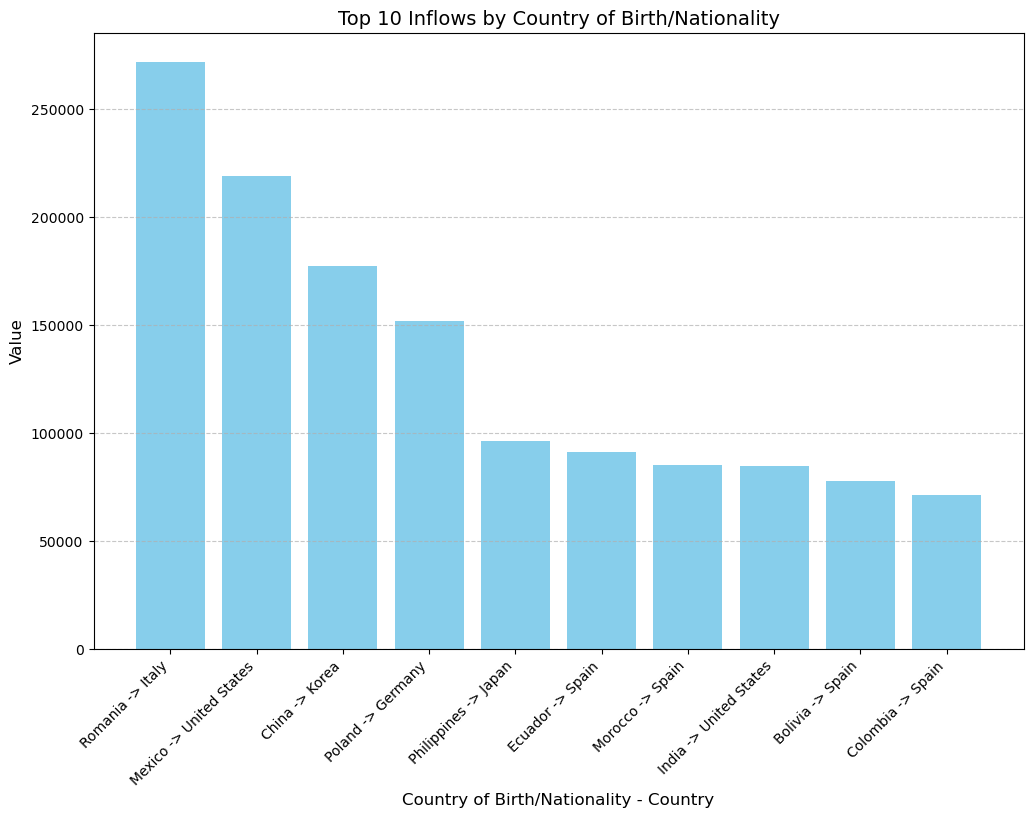

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(top_10_inflows['Country of birth/nationality'] + ' -> ' + top_10_inflows['Country'], top_10_inflows['Value'], color='skyblue')  # Changed color to 'skyblue'
plt.xlabel('Country of Birth/Nationality - Country', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Top 10 Inflows by Country of Birth/Nationality', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


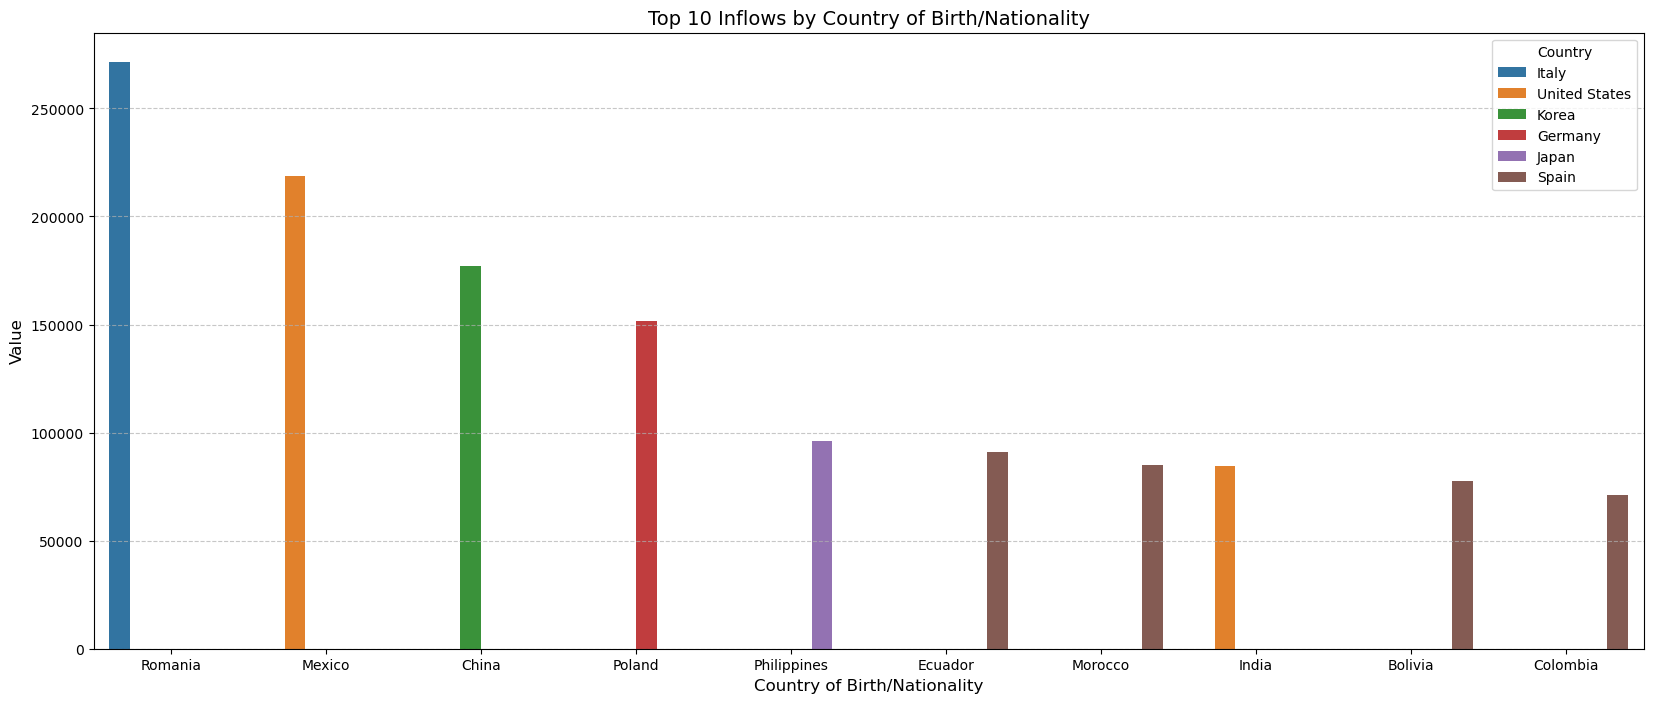

In [153]:
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.barplot(x='Country of birth/nationality', y='Value', data=top_10_inflows, hue='Country', dodge=True)
plt.xlabel('Country of Birth/Nationality', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Top 10 Inflows by Country of Birth/Nationality', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Top 10 Emigrating countries from 2010-2020

In [158]:
inflows_10_second_decade = inflows_cleaned[(inflows_cleaned['Year'] > 2010) & (inflows_cleaned['Year'] <= 2020)]
inflows_10_second_decade['Year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [159]:
inflows_10_second_decade = inflows_10_second_decade[inflows_10_second_decade['CO2'] != 'TOT'].sort_values('Value', ascending=False).drop_duplicates('CO2')


In [160]:
inflows_10_second_decade = inflows_10_second_decade.nlargest(10, 'Value')
inflows_10_second_decade

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
168236,SYR,Syria,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2015,2015,309699.0
143860,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2018,2018,251971.0
40056,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,KOR,Korea,2014,2014,192858.0
140375,POL,Poland,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2014,2014,192172.0
116086,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2016,2016,173543.0
187776,VNM,Viet Nam,B11,Inflows of foreign population by nationality,TOT,Total,JPN,Japan,2019,2019,148167.0
187218,VEN,Venezuela,B11,Inflows of foreign population by nationality,TOT,Total,CHL,Chile,2019,2019,135850.0
180848,UKR,Ukraine,B11,Inflows of foreign population by nationality,TOT,Total,POL,Poland,2020,2020,111020.0
85788,IRQ,Iraq,B11,Inflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2018,2018,110315.0
78352,HTI,Haiti,B11,Inflows of foreign population by nationality,TOT,Total,CHL,Chile,2018,2018,108673.0


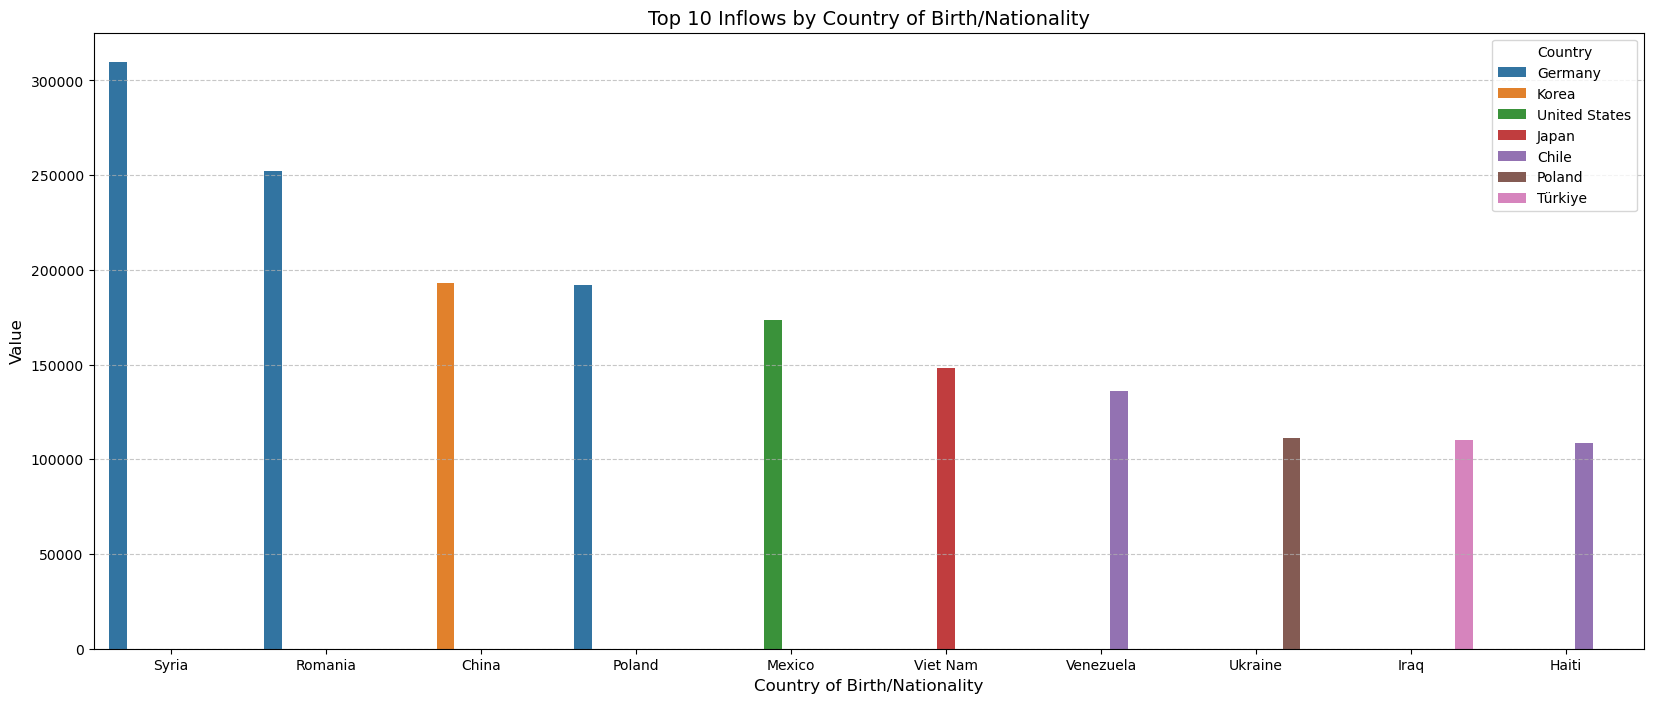

In [161]:
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.barplot(x='Country of birth/nationality', y='Value', data=inflows_10_second_decade, hue='Country', dodge=True)
plt.xlabel('Country of Birth/Nationality', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Top 10 Inflows by Country of Birth/Nationality', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Top 10 outflows of foreign population from 2000-2010



In [115]:
outflows_of_foreign_pop = inflows[inflows['Variable'] == 'Outflows of foreign population by nationality']



In [116]:
outflows_of_foreign_pop



,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
22,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,1.0,NaN,NaN
23,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,3.0,NaN,NaN
24,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,61.0,NaN,NaN
25,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2005,2005,123.0,NaN,NaN
26,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2006,2006,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464635,OMN,Oman,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,27.0,NaN,NaN
464636,KNA,Saint Kitts and Nevis,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,27.0,NaN,NaN
464637,SLE,Sierra Leone,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,20.0,NaN,NaN
464638,LKA,Sri Lanka,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,30.0,NaN,NaN


In [117]:
outflows_10_first_decade = outflows_of_foreign_pop[(outflows_of_foreign_pop['Year'] <= 2010)]
outflows_10_first_decade['Year'].unique()


array([2000, 2001, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2002, 2003])

In [118]:
outflows_10_first_decade

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
22,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,1.0,NaN,NaN
23,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,3.0,NaN,NaN
24,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,61.0,NaN,NaN
25,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2005,2005,123.0,NaN,NaN
26,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,AUS,Australia,2006,2006,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374610,YUCS,Former Yugoslavia,B12,Outflows of foreign population by nationality,TOT,Total,DNK,Denmark,2006,2006,29.0,NaN,NaN
374611,YUCS,Former Yugoslavia,B12,Outflows of foreign population by nationality,TOT,Total,DNK,Denmark,2007,2007,51.0,NaN,NaN
374612,YUCS,Former Yugoslavia,B12,Outflows of foreign population by nationality,TOT,Total,DNK,Denmark,2008,2008,37.0,NaN,NaN
374613,YUCS,Former Yugoslavia,B12,Outflows of foreign population by nationality,TOT,Total,DNK,Denmark,2009,2009,41.0,NaN,NaN


In [119]:
outflows_10_first_decade = outflows_10_first_decade[outflows_10_first_decade['CO2'] != 'TOT'].sort_values('Value', ascending=False).drop_duplicates('CO2')


In [120]:
top_10_outflows = outflows_10_first_decade.nlargest(10, 'Value')
top_10_outflows

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
183030,GBR,United Kingdom,B12,Outflows of foreign population by nationality,TOT,Total,GBR,United Kingdom,2010,2010,125000.0,NaN,NaN
40073,CHN,China,B12,Outflows of foreign population by nationality,TOT,Total,KOR,Korea,2009,2009,121473.0,NaN,NaN
140391,POL,Poland,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2008,2008,119649.0,NaN,NaN
153381,SCG,Serbia and Montenegro,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2000,2000,89269.0,NaN,NaN
139536,PHL,Philippines,B12,Outflows of foreign population by nationality,TOT,Total,JPN,Japan,2004,2004,86261.0,NaN,NaN
144402,ROU,Romania,B12,Outflows of foreign population by nationality,TOT,Total,ESP,Spain,2009,2009,50473.0,NaN,NaN
176913,TUR,Türkiye,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2000,2000,40263.0,NaN,NaN
120952,MAR,Morocco,B12,Outflows of foreign population by nationality,TOT,Total,ESP,Spain,2010,2010,37662.0,NaN,NaN
88198,ITA,Italy,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2004,2004,35056.0,NaN,NaN
27308,BRA,Brazil,B12,Outflows of foreign population by nationality,TOT,Total,JPN,Japan,2009,2009,33153.0,NaN,NaN


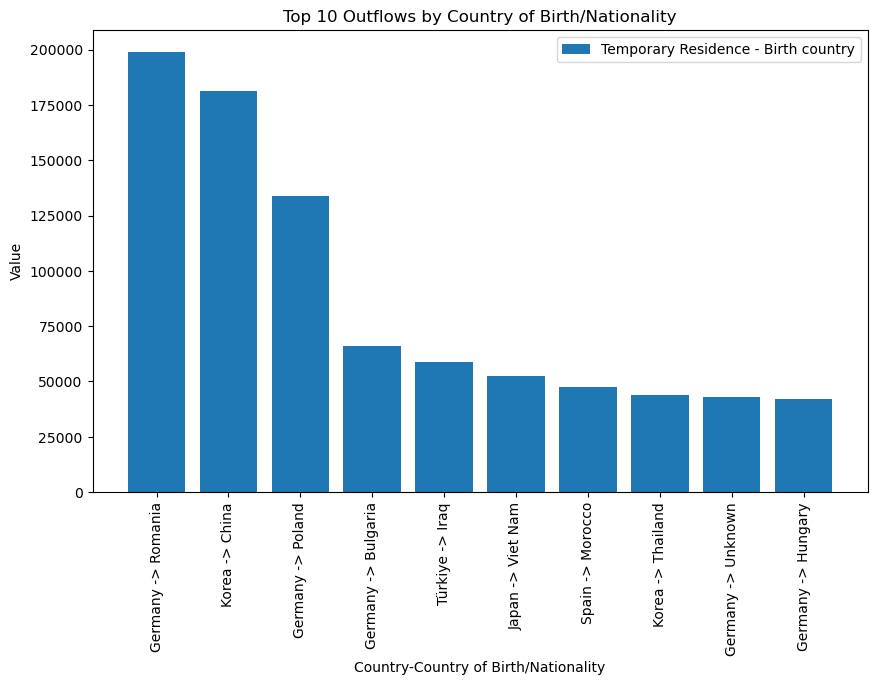

In [157]:

plt.figure(figsize=(10, 6))
plt.bar(top_10_outflows['Country'] + ' -> ' + top_10_outflows['Country of birth/nationality'], top_10_outflows['Value'])
plt.xlabel('Country-Country of Birth/Nationality')
plt.ylabel('Value')
plt.title('Top 10 Outflows by Country of Birth/Nationality')
plt.legend(['Temporary Residence - Birth country'])
plt.xticks(rotation=90)
plt.show()


# Outflows 2010-2020

In [123]:
outflows_10_second_decade = outflows_of_foreign_pop[(outflows_of_foreign_pop['Year'] > 2010) & (outflows_of_foreign_pop['Year'] <= 2020)]
outflows_10_second_decade['Year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [124]:
outflows_10_second_decade = outflows_10_second_decade[outflows_10_second_decade['CO2'] != 'TOT'].sort_values('Value', ascending=False).drop_duplicates('CO2')


In [125]:
top_10_outflows = outflows_10_second_decade.nlargest(10, 'Value')
top_10_outflows

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
143883,ROU,Romania,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2019,2019,198860.0,NaN,NaN
40083,CHN,China,B12,Outflows of foreign population by nationality,TOT,Total,KOR,Korea,2019,2019,181232.0,NaN,NaN
140399,POL,Poland,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2016,2016,133803.0,NaN,NaN
29499,BGR,Bulgaria,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2019,2019,66155.0,NaN,NaN
464245,IRQ,Iraq,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2019,2019,58631.0,NaN,NaN
187792,VNM,Viet Nam,B12,Outflows of foreign population by nationality,TOT,Total,JPN,Japan,2019,2019,52566.0,NaN,NaN
120955,MAR,Morocco,B12,Outflows of foreign population by nationality,TOT,Total,ESP,Spain,2013,2013,47463.0,NaN,NaN
327319,THA,Thailand,B12,Outflows of foreign population by nationality,TOT,Total,KOR,Korea,2019,2019,43747.0,NaN,NaN
192161,UUU,Unknown,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2016,2016,43118.0,NaN,NaN
80235,HUN,Hungary,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2016,2016,42264.0,NaN,NaN


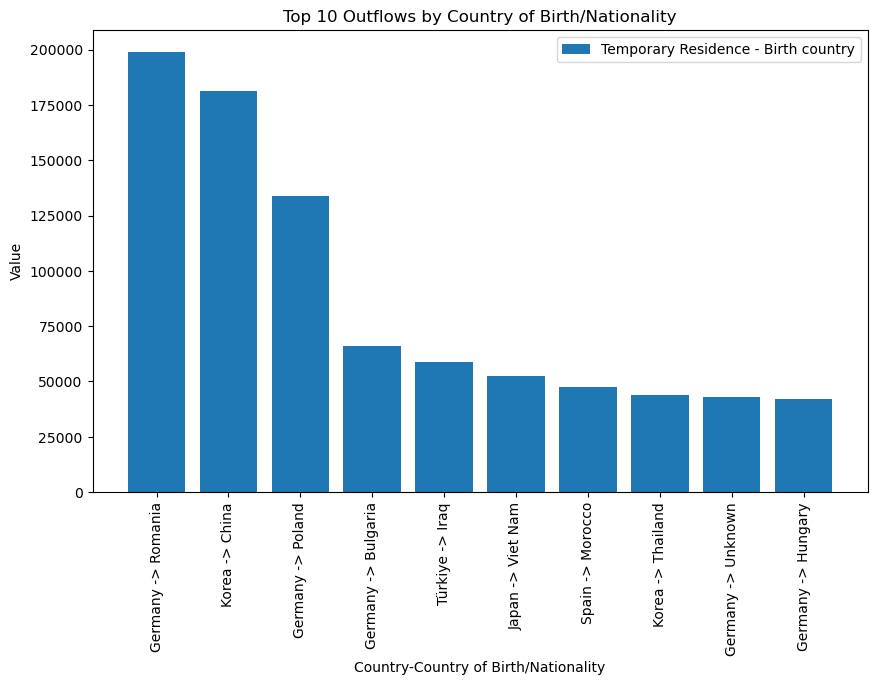

In [127]:

plt.figure(figsize=(10, 6))
plt.bar(top_10_outflows['Country'] + ' -> ' + top_10_outflows['Country of birth/nationality'], top_10_outflows['Value'])
plt.xlabel('Country-Country of Birth/Nationality')
plt.ylabel('Value')
plt.title('Top 10 Outflows by Country of Birth/Nationality')
plt.legend(['Temporary Residence - Birth country'])
plt.xticks(rotation=90)
plt.show()
